In [199]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Using fft.dct

In [200]:
from scipy import fft
test = fft.dct([1, 2, 3, 4], 2, norm='ortho') # Use SciPy

In [201]:
test

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

#### Build 1D-DCT II Function

In [202]:
def dct(data):
    N = len(data)
    f = 0
    cof = np.zeros(N)
    for k in range(N):
        if k==0:
            f = math.sqrt(1/(4*N))
        else:
            f = math.sqrt(1/(2*N))

        s = 0
        for n in range(N):
            out = data[n] * math.cos((math.pi*k) / (2*N) * (2*n+1))
            s = s + out
        cof[k] = 2 * f * s
        
    return np.around(cof, decimals=7)

In [203]:
data = np.array([1,2, 3, 4])
data

array([1, 2, 3, 4])

In [204]:
output = dct(data)
output

array([ 5.       , -2.2304425, -0.       , -0.1585127])

#### Data-1D -> Signal 

In [205]:
data1D = np.random.randint(256, size=64)
data1D

array([156,  43, 247, 197,  34,  15,  78,  14,  50,  91, 216,  82,  73,
        88,  91, 115,  32, 115,  55, 125, 170, 232,  48, 136,  80, 137,
        46,  46, 238,  55, 156,  74, 126,  61,  55, 157, 250, 163, 104,
       168, 106, 220,  83,  36, 173, 102,  40, 192,   5, 234, 184, 189,
       174,  86,   0,  37,  79, 220, 186, 223, 245, 109, 233,  37])

In [206]:
N1D = len(data1D)
index1D = np.arange(N1D)
index1D

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

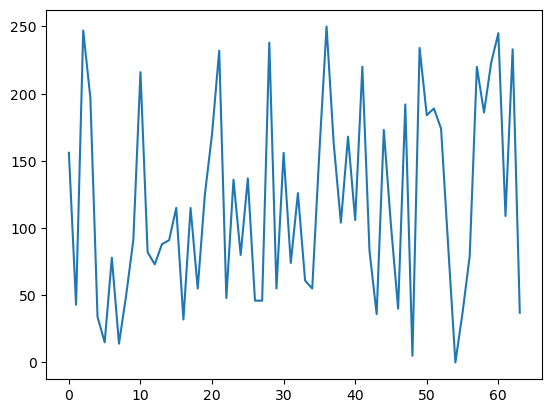

In [207]:
plt.plot(index1D, data1D)

In [208]:
output1D = dct(data1D)
output1D

array([ 951.5      , -125.8161269,   11.2938974,   -6.7217171,
         56.8403137,  -14.118307 ,   82.8645572,   61.7623221,
         22.850521 ,  -29.8769177,   89.0814203,   72.0848107,
        -15.6783193,  195.2060955, -106.8242504,   36.0197799,
       -167.5870976,   45.7233916,   -5.6351715, -102.1157329,
        -39.2675485,  -79.5327994,  -13.2639847,  -65.4519136,
         -7.3693753,   89.4069788,  -41.9597499,  -21.4523839,
        -19.8683491,  -47.7175739,  -98.1371612,   66.9571073,
          3.25     ,  -75.1811689,  -24.2283017,   80.7578372,
        100.3809774,   81.4234286,   35.8863507,   28.9814815,
         45.172417 ,   69.7431339,  -11.9863354,  109.0550198,
        -22.2724951,   25.0813663,   80.6611827,  -21.8150178,
        -59.6584212,  203.0944334,  -39.4651596,   70.2918331,
        -50.0977189,  -25.1590931,   39.6865695,   41.5308434,
        -90.688333 ,  -22.1755964,   12.8929432,  153.9107832,
         45.2464504,  -60.0259658,   45.6047329,  -42.9

In [209]:
o1D = fft.dct(data1D, norm='ortho') # Use SciPy
o1D

array([ 951.5       , -125.81612692,   11.29389738,   -6.72171712,
         56.84031373,  -14.11830704,   82.86455715,   61.76232214,
         22.85052102,  -29.87691765,   89.08142028,   72.08481074,
        -15.6783193 ,  195.20609554, -106.82425043,   36.01977989,
       -167.5870976 ,   45.72339159,   -5.63517147, -102.1157329 ,
        -39.26754854,  -79.53279937,  -13.26398472,  -65.4519136 ,
         -7.36937533,   89.40697882,  -41.95974995,  -21.45238393,
        -19.86834909,  -47.71757388,  -98.13716119,   66.95710735,
          3.25      ,  -75.18116891,  -24.22830175,   80.75783724,
        100.38097739,   81.4234286 ,   35.88635069,   28.98148145,
         45.17241698,   69.74313389,  -11.98633538,  109.05501985,
        -22.2724951 ,   25.08136634,   80.66118269,  -21.81501781,
        -59.65842118,  203.09443338,  -39.46515959,   70.29183313,
        -50.09771892,  -25.15909309,   39.68656946,   41.53084336,
        -90.68833299,  -22.17559641,   12.89294323,  153.91078

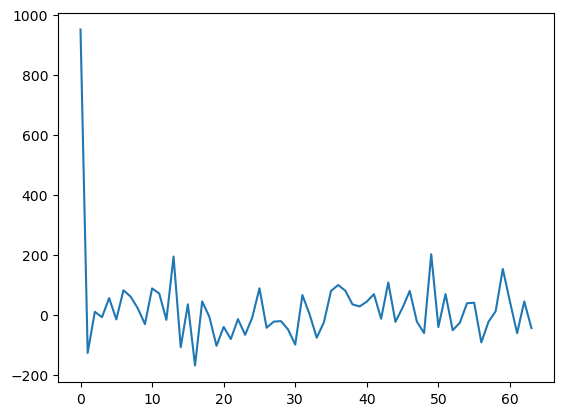

In [210]:
plt.plot(index1D, output1D)

#### Inverse 1D-DCT II Function

In [211]:
def idct(cof):
    N = len(cof)
    data = np.zeros(N)
    for k in range(N):
        s = 0
        for n in range(1, N):
            out = cof[n] * math.cos(math.pi/(2*N)*((2*k)+1)*n)
            s = s + out
        data[k] = (cof[0]/math.sqrt(N)) + (math.sqrt(2/N)*s)
        
    return np.around(data, decimals=7)

In [212]:
output1D_i = idct(output1D)
output1D_i

array([156.       ,  43.       , 247.       , 197.       ,  34.       ,
        15.       ,  78.       ,  14.       ,  50.       ,  91.       ,
       216.       ,  82.       ,  73.       ,  88.       ,  91.       ,
       115.       ,  32.       , 114.9999999,  55.       , 125.       ,
       170.       , 232.       ,  48.       , 136.       ,  80.       ,
       137.       ,  46.       ,  46.       , 238.       ,  55.       ,
       156.       ,  74.       , 126.       ,  61.       ,  55.       ,
       157.       , 250.       , 163.       , 104.       , 168.       ,
       106.       , 220.       ,  83.       ,  36.       , 173.       ,
       102.       ,  40.       , 192.       ,   5.       , 234.       ,
       184.       , 189.       , 174.       ,  86.       ,  -0.       ,
        37.       ,  79.       , 220.       , 186.       , 223.       ,
       245.       , 109.       , 233.       ,  37.0000001])

In [213]:
o1D_i = fft.idct(output1D, norm='ortho') # Use SciPy
o1D_i

array([ 1.56000000e+02,  4.30000000e+01,  2.47000000e+02,  1.97000000e+02,
        3.40000000e+01,  1.50000000e+01,  7.80000000e+01,  1.40000000e+01,
        5.00000000e+01,  9.10000000e+01,  2.16000000e+02,  8.20000000e+01,
        7.30000000e+01,  8.80000000e+01,  9.10000000e+01,  1.15000000e+02,
        3.20000000e+01,  1.15000000e+02,  5.50000000e+01,  1.25000000e+02,
        1.70000000e+02,  2.32000000e+02,  4.80000000e+01,  1.36000000e+02,
        8.00000000e+01,  1.37000000e+02,  4.60000000e+01,  4.60000000e+01,
        2.38000000e+02,  5.50000000e+01,  1.56000000e+02,  7.40000000e+01,
        1.26000000e+02,  6.10000000e+01,  5.50000000e+01,  1.57000000e+02,
        2.50000000e+02,  1.63000000e+02,  1.04000000e+02,  1.68000000e+02,
        1.06000000e+02,  2.20000000e+02,  8.30000000e+01,  3.60000000e+01,
        1.73000000e+02,  1.02000000e+02,  4.00000000e+01,  1.92000000e+02,
        4.99999998e+00,  2.34000000e+02,  1.84000000e+02,  1.89000000e+02,
        1.74000000e+02,  

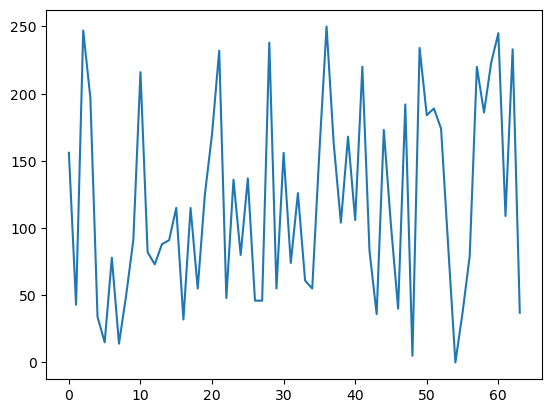

In [214]:
plt.plot(index1D, output1D_i)